In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tqdm as tqdm

In [ ]:
proj_path = "/content/drive/MyDrive/2023/2023_하계_시그널하우스_연구체험 인턴십/01_BIS prediction using EEG signals"

# New Section

In [ ]:
#data 41

In [ ]:
data41 = np.load(f'{proj_path}/data/raw/41.npy')

print(data41)

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [ ]:
#전처리 과정 담은 함수
from tqdm import tqdm

data = data41

bis=data[:,0]
bis_cond = ~np.isnan(bis)
idx_arr = np.arange(0, len(bis), 1)
bis_idx = idx_arr[bis_cond]
bis_no_nan = bis[bis_idx]

eeg = data[:, 2]
start = 55*100
eeg_start_idx = bis_idx - start
eeg_start_idx = eeg_start_idx[eeg_start_idx >= 0]

sqi = data[:,1]
sqi_cond = ~np.isnan(sqi)
idx_arr_s = np.arange(0, len(sqi), 1)
sqi_idx = idx_arr_s[sqi_cond]
sqi_no_nan = sqi[sqi_idx]

eeg_segments = []
bis_label = []
sqi_label = []

for start_idx in tqdm(eeg_start_idx):
  end_idx = start_idx + 30 * 100
  eeg_segments += list([eeg[start_idx:end_idx]])
  n = len(eeg_segments)
  bis_label = bis_no_nan[:n]
  sqi_label = sqi_no_nan[:n]

eeg_segments = np.array(eeg_segments)
bis_label = np.array(bis_label)
sqi_label = np.array(sqi_label)

  # sqi도 사용
sqi_cond2 = sqi_label > 90

bis_label = bis_label[sqi_cond2]
sqi_label = sqi_label[sqi_cond2]
eeg_segments = eeg_segments[sqi_cond2]

  #eeg nan 채우기
A = eeg_segments
col_mean = np.nanmean(A, axis=1)
inds = np.where(np.isnan(A))
A[inds] = np.take(col_mean, inds[1])

  #eeg selection
  #eeg 구간 별 max list 뽑기
eeg_seg = eeg_segments
map(max, eeg_seg)
eeg_max_list = list(map(max, eeg_seg))

eeg_max_list = np.array(eeg_max_list)

  # 절대값
eeg_max_abs = np.abs(eeg_max_list)

  # 제거
eeg_del_con=  eeg_max_abs < 100
eeg_maxsel = eeg_seg[eeg_del_con]
bis_label = bis_label[eeg_del_con]

  #eeg 구간 별 min
map(min, eeg_maxsel)
eeg_sel_min_list = list(map(min, eeg_maxsel))
eeg_sel_min_list = np.array(eeg_sel_min_list)

eeg_sel_min_abs = np.abs(eeg_sel_min_list)
eeg_sel_del_con=  eeg_sel_min_abs < 100

eeg_final = eeg_maxsel[eeg_sel_del_con]
bis_label = bis_label[eeg_sel_del_con]

  # eeg < 0 mean으로 채우기
column_means = np.mean(eeg_final[eeg_final > 0], axis=0)
eeg_final[eeg_final <= 0] = column_means


  # eeg_selected = np.reshape(eeg_selected, [-1,1,3000])
  # bis_selected = np.reshape(bis_selected, [-1,1])

inputs = eeg_final
outputs = bis_label

  # 튜플


100%|██████████| 8129/8129 [00:00<00:00, 433277.81it/s]
<ipython-input-85-55bd21d93f47>:47: RuntimeWarning: Mean of empty slice
  col_mean = np.nanmean(A, axis=1)


In [ ]:
eeg_final.shape

(2223, 3000)

In [ ]:
eeg_final

array([[ 9.13135764,  9.13135764,  9.13135764, ...,  0.85      ,
         9.13135764,  9.13135764],
       [11.2       , 14.05      , 15.1       , ...,  9.13135764,
         9.13135764,  9.13135764],
       [11.35      ,  8.85      ,  6.6       , ...,  9.13135764,
         9.13135764,  3.45      ],
       ...,
       [ 4.        ,  9.13135764,  9.13135764, ...,  9.13135764,
         9.13135764,  9.13135764],
       [ 9.13135764,  9.13135764,  9.13135764, ..., 12.45      ,
        11.9       ,  8.2       ],
       [ 9.13135764,  9.13135764,  1.5       , ...,  9.13135764,
         9.13135764,  9.13135764]])

In [ ]:
bis_label.shape

(5608,)

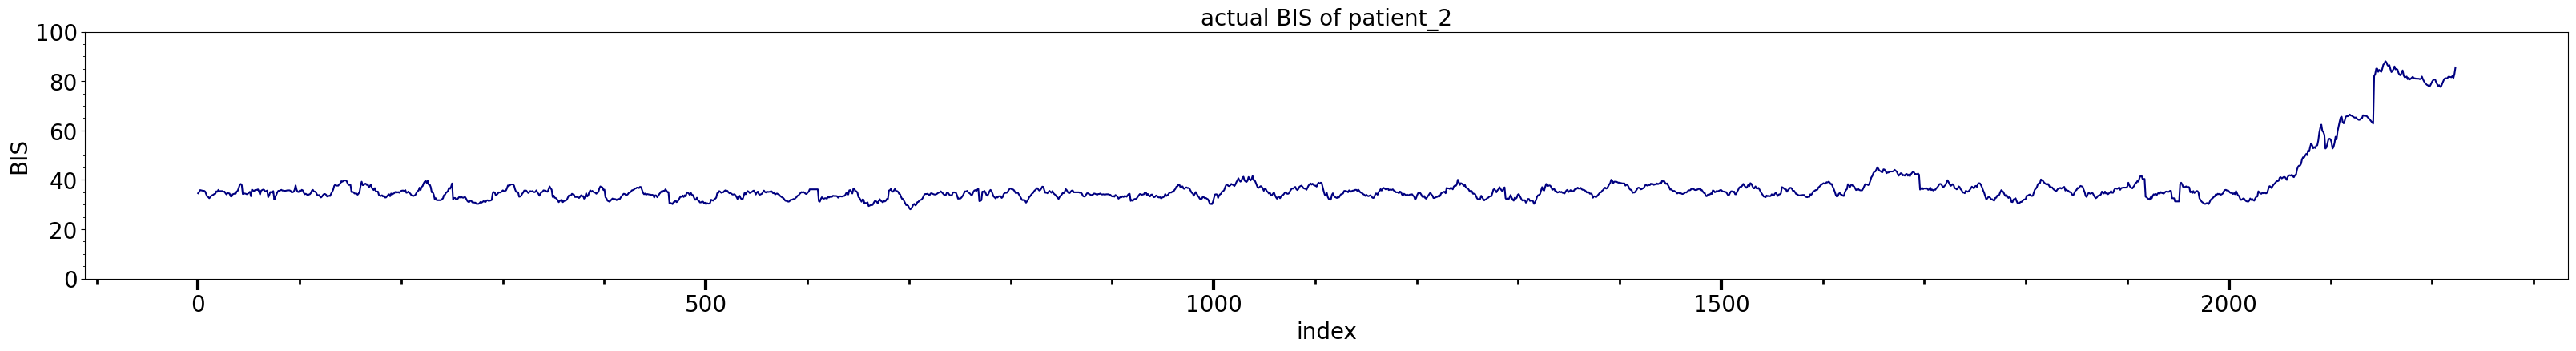

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time_values = np.linspace(0, 2223, 2223)  # Use the correct time values here

fig, ax = plt.subplots(figsize=(40, 4))

plt.plot(time_values, bis_label, color='navy')
plt.xlabel('index', fontsize=20)
plt.ylabel('BIS', fontsize=20, rotation=90)
plt.title('actual BIS of patient_2', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0, 100)

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)

plt.show()


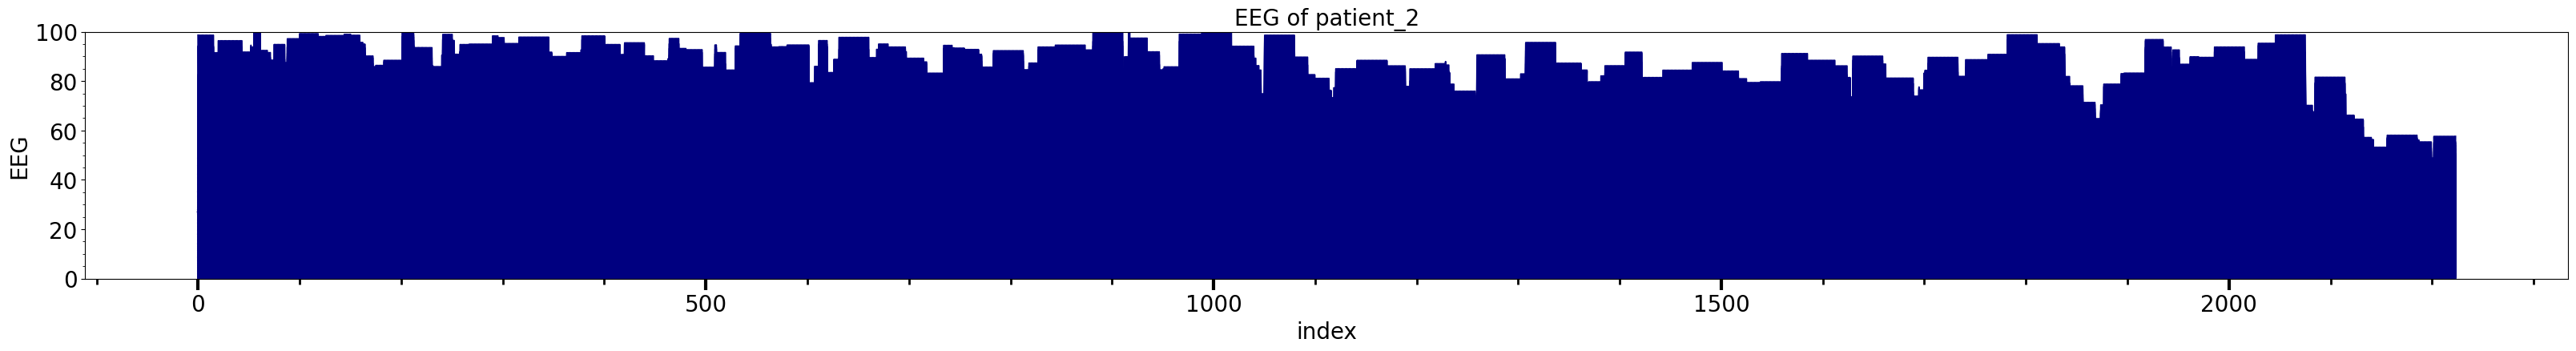

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time_values = np.linspace(0, 2223, 2223)  # Use the correct time values here

fig, ax = plt.subplots(figsize=(40, 4))

plt.plot(time_values, eeg_final, color='navy')
plt.xlabel('index', fontsize=20)
plt.ylabel('EEG', fontsize=20, rotation=90)
plt.title('EEG of patient_2', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0, 100)

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)

plt.show()


# 74

In [ ]:
#data 0

In [ ]:
data0 = np.load(f'{proj_path}/data/raw/0.npy')

print(data0)

[[  nan   nan 16.  ]
 [  nan   nan 16.35]
 [  nan   nan 16.05]
 ...
 [  nan   nan   nan]
 [  nan   nan   nan]
 [  nan   nan   nan]]


In [ ]:
#전처리 과정 담은 함수
from tqdm import tqdm

data = data0

bis=data[:,0]
bis_cond = ~np.isnan(bis)
idx_arr = np.arange(0, len(bis), 1)
bis_idx = idx_arr[bis_cond]
bis_no_nan = bis[bis_idx]

eeg = data[:, 2]
start = 55*100
eeg_start_idx = bis_idx - start
eeg_start_idx = eeg_start_idx[eeg_start_idx >= 0]

sqi = data[:,1]
sqi_cond = ~np.isnan(sqi)
idx_arr_s = np.arange(0, len(sqi), 1)
sqi_idx = idx_arr_s[sqi_cond]
sqi_no_nan = sqi[sqi_idx]

eeg_segments = []
bis_label = []
sqi_label = []

for start_idx in tqdm(eeg_start_idx):
  end_idx = start_idx + 30 * 100
  eeg_segments += list([eeg[start_idx:end_idx]])
  n = len(eeg_segments)
  bis_label = bis_no_nan[:n]
  sqi_label = sqi_no_nan[:n]

eeg_segments = np.array(eeg_segments)
bis_label = np.array(bis_label)
sqi_label = np.array(sqi_label)

  # sqi도 사용
sqi_cond2 = sqi_label > 90

bis_label = bis_label[sqi_cond2]
sqi_label = sqi_label[sqi_cond2]
eeg_segments = eeg_segments[sqi_cond2]

  #eeg nan 채우기
A = eeg_segments
col_mean = np.nanmean(A, axis=1)
inds = np.where(np.isnan(A))
A[inds] = np.take(col_mean, inds[1])

  #eeg selection
  #eeg 구간 별 max list 뽑기
eeg_seg = eeg_segments
map(max, eeg_seg)
eeg_max_list = list(map(max, eeg_seg))

eeg_max_list = np.array(eeg_max_list)

  # 절대값
eeg_max_abs = np.abs(eeg_max_list)

  # 제거
eeg_del_con=  eeg_max_abs < 100
eeg_maxsel = eeg_seg[eeg_del_con]
bis_label = bis_label[eeg_del_con]

  #eeg 구간 별 min
map(min, eeg_maxsel)
eeg_sel_min_list = list(map(min, eeg_maxsel))
eeg_sel_min_list = np.array(eeg_sel_min_list)

eeg_sel_min_abs = np.abs(eeg_sel_min_list)
eeg_sel_del_con=  eeg_sel_min_abs < 100

eeg_final = eeg_maxsel[eeg_sel_del_con]
bis_label = bis_label[eeg_sel_del_con]

#   # eeg < 0 mean으로 채우기
# column_means = np.mean(eeg_final[eeg_final > 0], axis=0)
# eeg_final[eeg_final <= 0] = column_means


  # eeg_selected = np.reshape(eeg_selected, [-1,1,3000])
  # bis_selected = np.reshape(bis_selected, [-1,1])

inputs = eeg_final
outputs = bis_label

  # 튜플


100%|██████████| 19575/19575 [00:00<00:00, 379827.45it/s]


In [ ]:
eeg_final.shape

(9547, 3000)

In [ ]:
bis_label.shape

(2875,)

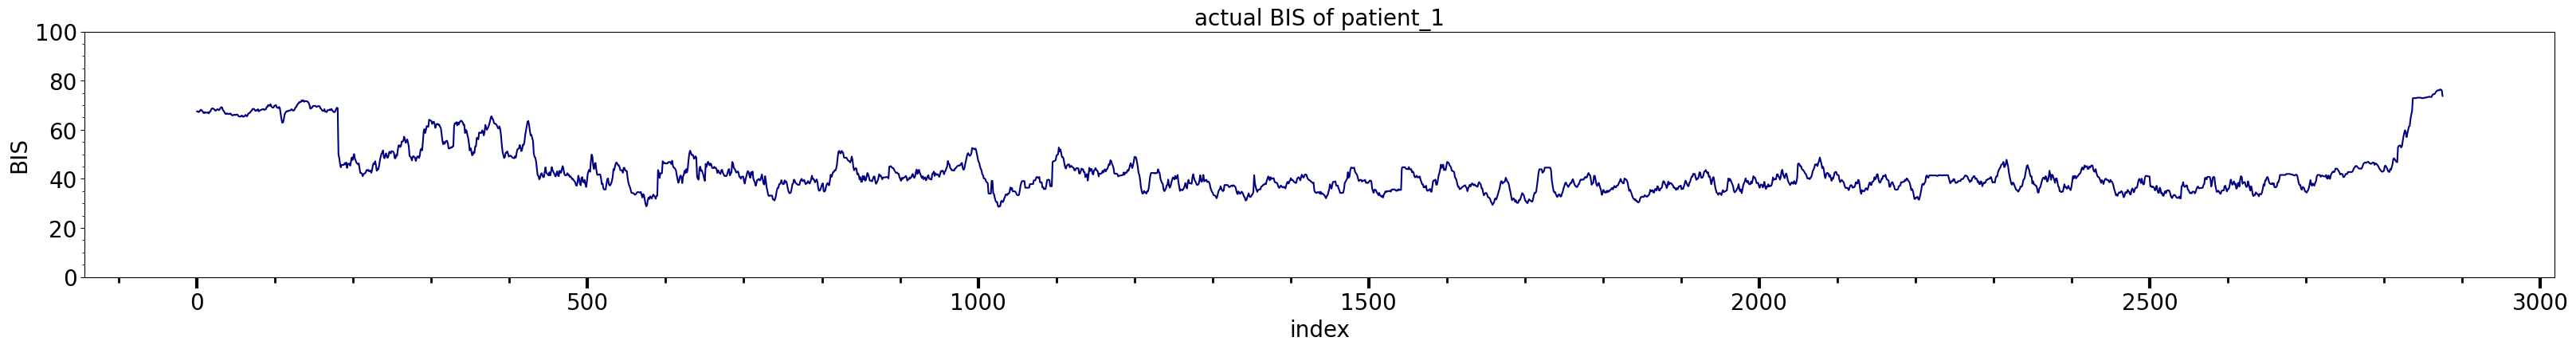

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time_values = np.linspace(0, 2875, 2875)  # Use the correct time values here

fig, ax = plt.subplots(figsize=(40, 4))

plt.plot(time_values, bis_label, color='navy')
plt.xlabel('index', fontsize=20)
plt.ylabel('BIS', fontsize=20, rotation=90)
plt.title('actual BIS of patient_1', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0, 100)

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)

plt.show()


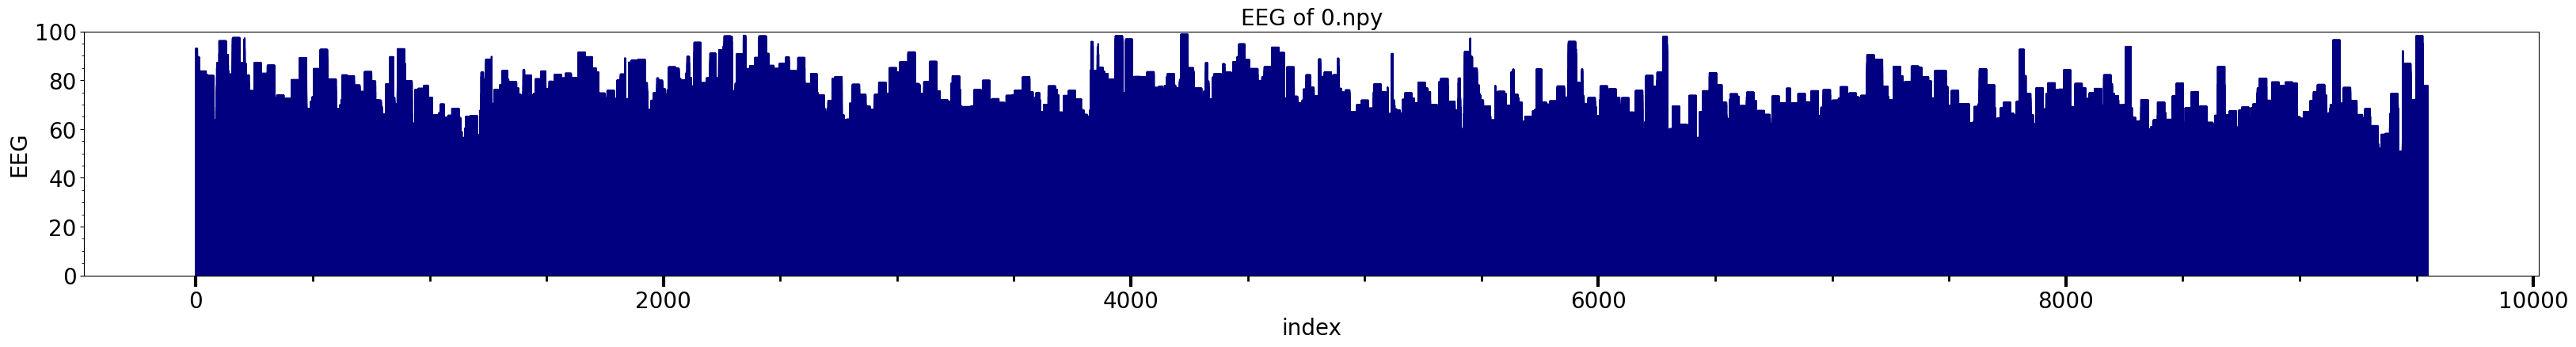

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time_values = np.linspace(0, 9547, 9547)  # Use the correct time values here

fig, ax = plt.subplots(figsize=(40, 4))

plt.plot(time_values, eeg_final, color='navy')
plt.xlabel('index', fontsize=20)
plt.ylabel('EEG', fontsize=20, rotation=90)
plt.title('EEG of 0.npy', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0, 100)

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)

plt.show()


# 8

In [ ]:
#data 8

In [ ]:
data8 = np.load(f'{proj_path}/data/raw/8.npy')

print(data8)

[[nan nan nan]
 [nan nan nan]
 [nan nan nan]
 ...
 [nan nan nan]
 [nan nan nan]
 [nan nan nan]]


In [ ]:
#전처리 과정 담은 함수
from tqdm import tqdm

data = data8

bis=data[:,0]
bis_cond = ~np.isnan(bis)
idx_arr = np.arange(0, len(bis), 1)
bis_idx = idx_arr[bis_cond]
bis_no_nan = bis[bis_idx]

eeg = data[:, 2]
start = 55*100
eeg_start_idx = bis_idx - start
eeg_start_idx = eeg_start_idx[eeg_start_idx >= 0]

sqi = data[:,1]
sqi_cond = ~np.isnan(sqi)
idx_arr_s = np.arange(0, len(sqi), 1)
sqi_idx = idx_arr_s[sqi_cond]
sqi_no_nan = sqi[sqi_idx]

eeg_segments = []
bis_label = []
sqi_label = []

for start_idx in tqdm(eeg_start_idx):
  end_idx = start_idx + 30 * 100
  eeg_segments += list([eeg[start_idx:end_idx]])
  n = len(eeg_segments)
  bis_label = bis_no_nan[:n]
  sqi_label = sqi_no_nan[:n]

eeg_segments = np.array(eeg_segments)
bis_label = np.array(bis_label)
sqi_label = np.array(sqi_label)

  # sqi도 사용
sqi_cond2 = sqi_label > 90

bis_label = bis_label[sqi_cond2]
sqi_label = sqi_label[sqi_cond2]
eeg_segments = eeg_segments[sqi_cond2]

  #eeg nan 채우기
A = eeg_segments
col_mean = np.nanmean(A, axis=1)
inds = np.where(np.isnan(A))
# A[inds] = np.take(col_mean, inds[1])

  #eeg selection
  #eeg 구간 별 max list 뽑기
eeg_seg = eeg_segments
map(max, eeg_seg)
eeg_max_list = list(map(max, eeg_seg))

eeg_max_list = np.array(eeg_max_list)

  # 절대값
eeg_max_abs = np.abs(eeg_max_list)

  # 제거
eeg_del_con=  eeg_max_abs < 100
eeg_maxsel = eeg_seg[eeg_del_con]
bis_label = bis_label[eeg_del_con]

  #eeg 구간 별 min
map(min, eeg_maxsel)
eeg_sel_min_list = list(map(min, eeg_maxsel))
eeg_sel_min_list = np.array(eeg_sel_min_list)

eeg_sel_min_abs = np.abs(eeg_sel_min_list)
eeg_sel_del_con=  eeg_sel_min_abs < 100

eeg_final = eeg_maxsel[eeg_sel_del_con]
bis_label = bis_label[eeg_sel_del_con]

  # eeg < 0 mean으로 채우기
column_means = np.mean(eeg_final[eeg_final > 0], axis=0)
eeg_final[eeg_final <= 0] = column_means


  # eeg_selected = np.reshape(eeg_selected, [-1,1,3000])
  # bis_selected = np.reshape(bis_selected, [-1,1])

inputs = eeg_final
outputs = bis_label

  # 튜플


100%|██████████| 5063/5063 [00:00<00:00, 399596.58it/s]


In [ ]:
eeg_final.shape

(1913, 3000)

In [ ]:
bis_label.shape

(1913,)

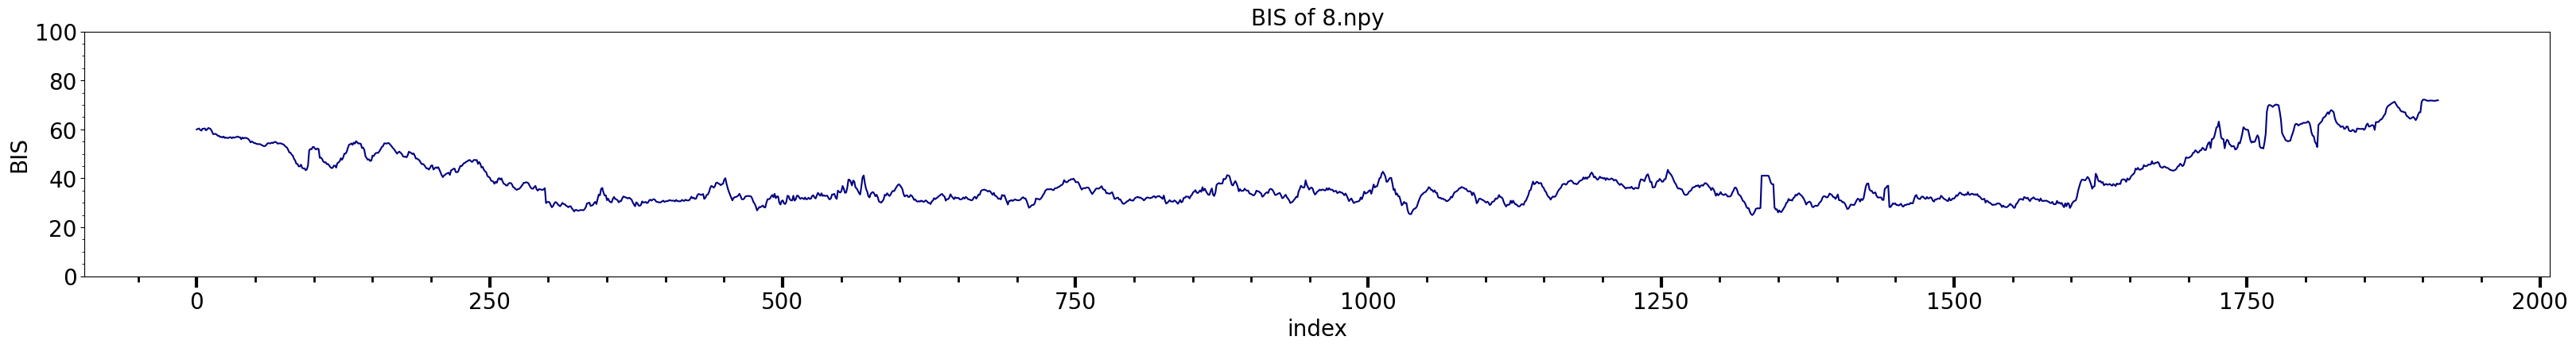

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time_values = np.linspace(0, 1913, 1913)  # Use the correct time values here

fig, ax = plt.subplots(figsize=(40, 4))

plt.plot(time_values, bis_label, color='navy')
plt.xlabel('index', fontsize=20)
plt.ylabel('BIS', fontsize=20, rotation=90)
plt.title('BIS of 8.npy', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0, 100)

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)

plt.show()


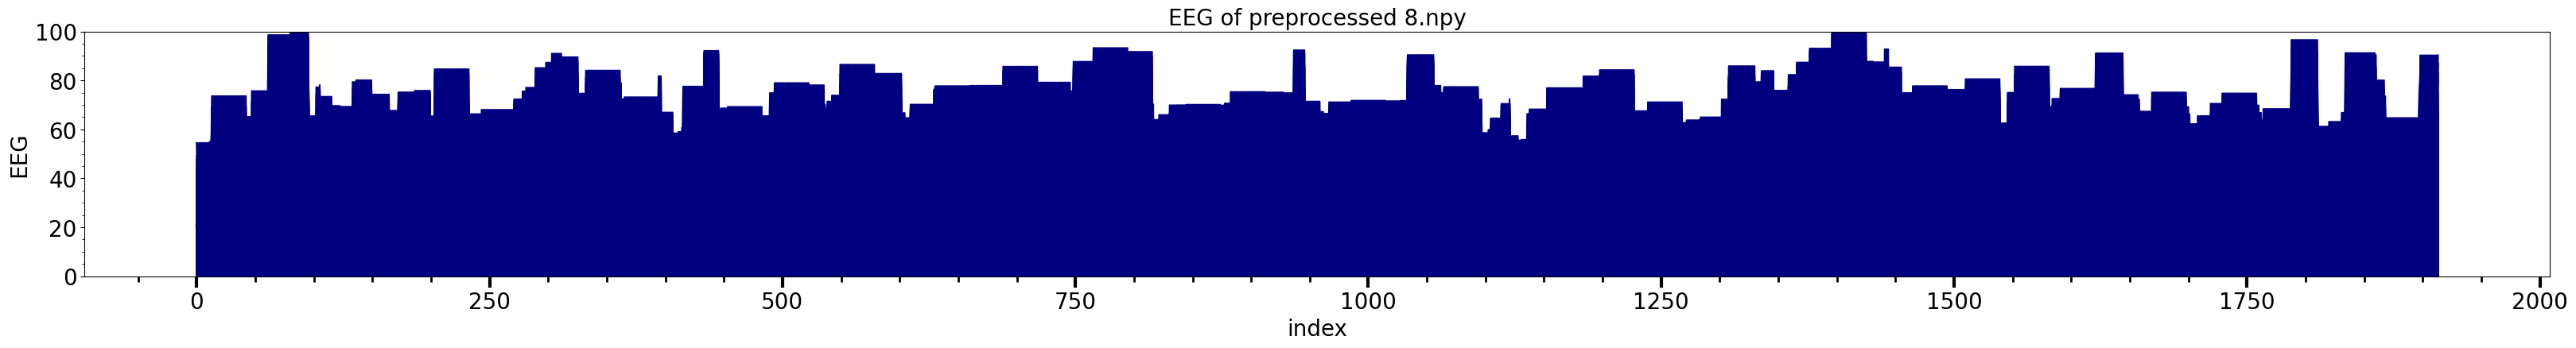

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

time_values = np.linspace(0, 1913, 1913)  # Use the correct time values here

fig, ax = plt.subplots(figsize=(40, 4))

plt.plot(time_values, eeg_final, color='navy')
plt.xlabel('index', fontsize=20)
plt.ylabel('EEG', fontsize=20, rotation=90)
plt.title('EEG of preprocessed 8.npy', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0, 100)

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.xaxis.get_ticklocs(minor=True)

ax.tick_params(axis='x', labelsize=20, length=10, width=3)
ax.tick_params(axis='x', which='minor', length=5, width=2)

plt.show()
